# **Trabalho Prático 02 - Clusterização**
### **Professor:** Wagner Meira Jr. (Mineração de Dados)
### **Aluno:** Bernardo Reis de Almeida (2021032234)
### **Tema:** Estudo Sistemático de Dados Musicais
### **Bases de Dados:** https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
### . . . . . . . . . . . . . . . https://www.kaggle.com/datasets/andrewmvd/spotify-playlists

**Obs.: Nenhuma ferramenta automatizada foi utilizada para a elaboração deste trabalho prático.**

## **Introdução**
Um dos produtos midiáticos mais consumidos na atualidade é a música. Seja no caminho ao trabalho, durante uma sessão na academia, durante os estudos, ou mesmo pela música em si, há uma universalidade nessa peça de expressão e de prazer que remonta desde os primórdios da raça humana. Com a popularização das plataformas de streaming, as quais proporcionam um acesso prático e direto implantado nesse ecossistema digital, criou-se um mercado extremamente complexo em torno da música que agrega uma quantidade massiva de informações, fenômeno que tende apenas a crescer, congregando cada vez mais dados.

Nesse cenário, é evidente que surja um desejo em extrair conhecimentos dessas informações e em os aplicar sob uma lógica de aprimoramento das tecnologias em uso no universo musical. No presente trabalho prático, será explorada a questão da clusterização e de suas aplicabilidades em sistemas de recomendações, os quais assumem noções de similaridade entre os objetos envolvidos. Entretanto, há um problema particular nessa abordagem: uma caracterização precisa de diversos aspectos de uma música não é uma questão trivial, o que torna sua modelagem e a escolha de algoritmos adequados um ponto delicado. Ademais, não existe uma categorização real desses objetos em classes, o que torna ainda menos óbvio questões relacionadas à validação dos resultados obtidos.

O presente trabalho prático, pois, tem por objetivo a exploração de formas de modelagem da música como um dado e a comparação de diferentes abordagens de clusterização sobre o acervo digital da plataforma de streaming "Spotify". Para a validação dos resultados, será utilizado como métrica a coesão proporcionada pelo clustering obtido sobre o conjunto de músicas contidas nas playlists de usuários. A ideia é observar o passado como uma estratégia para se prever o futuro, esperando-se um comportamento, no mínimo, similar em alguma medida. Será utilizada como tecnologia de apoio a linguagem de programação "Python", com as bibliotecas "Pandas" para manipulação dos dados e "SciKit Learn" para clusterização.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Some libraries generate warnings in regard to deprecated compatibility issues that do not affect the results.
# There are also some UserWarnings in regard to graph plotting that are ignored for better output formatting.
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)

## **Metodologia**
Conforme o modelo CRISP-DM, em um primeiro momento, os objetivos da presente prática serão discutidos na seção [Entendimento do Projeto]. Em seguida, uma análise exploratória dos dados será abordada na seção [Entendimento dos Dados]. Após isso, a preparação efetiva da base para a tarefa será discorrida na seção [Preparação dos Dados]. A escolha e a implementação do modelo de mineração serão discutidos na seção [Modelagem]. Os resultados em si serão apresentados na seção [Apresentação e Validação dos Resultados]. Por fim, conclusões e reflexões sobre aplicações no domínio de interesse, assim como sobre o projeto como um todo, estarão na seção [Implantação e Conclusões].

## **Entendimento do Projeto**
O cerne do presente projeto de mineração de dados consiste na obtenção de um mecanismo de agrupamento de músicas consistente com as playlists de usuários. O objetivo principal, pois, é possuir, para cada música, um acervo de outras que mais se aproximam dela conforme as métricas definidas, o que permite a implantação de um sistema de recomendações robusto. Em termos técnicos, isso se traduz na modelagem adequada das músicas como pontos em um espaço d-dimensional e na identificação do algoritmo que gere o clustering com os melhores valores para as métricas definidas. Nessa lógica, o principal critério de sucesso para o mecanismo de agrupamento encontrado é sua consistência com esses dados secundários, isto é, o sucesso, no sentido da mineração de dados, será alcançado por uma clusterização das músicas que apresente um alto grau de coesão com relação aos conjuntos contidos nas playlists, ou seja, as músicas escutadas por uma mesma pessoa devem ser, na medida do possível, próximas entre si e distantes de outras conforme o modelo definido pelo cluster.

Os principais recursos disponíveis dizem respeito ao acervo de músicas e ao conjunto de playlists de usuários da plataforma de streaming “Spotify”, uma das maiores do mercado. Uma das principais questões a serem levadas em conta com relação a essas informações diz respeito aos atributos associados a cada entrada na base escolhida. Em particular, cada música é caracterizada por diferentes variáveis, sejam elas dançabilidade, cadência, nota musical, dentre outras. Sua heterogeneidade em diversos aspectos deve ser ponderada para a escolha daquelas efetivamente relevantes para a representação desse objeto como um ponto em um espaço d-dimensional.

Nesse âmbito, outra questão diz respeito ao fato de não existir uma classificação real bem definida para o acervo de músicas. De certo modo, há diferentes maneiras de as organizar em grupos, como, por exemplo, por gênero ou por artista. Entretanto, cada uma agrega em si diferentes semânticas, as quais devem ser relevadas sob efeito dos objetivos pretendidos. Além disso, uma alta dimensionalidade dos dados pode representar uma dificuldade de visualização de sua disposição, prejudicando ainda mais a verificação de sua “clusterabilidade” e de sua consistência com o agrupamento obtido.

Finalmente, outros pontos que são relevantes - mas que não serão abordados de maneira sistemática no presente trabalho - consistem em: os dados são referentes a apenas uma distribuidora de músicas e, portanto, há margem para algum viés; o gosto musical das pessoas não necessariamente é coeso e, portanto, a aplicabilidade dos resultados obtidos é debatível; podem existir diferenças técnicas (como nomenclatura, temporalidade ou formatação) entre ambas as bases de dados utilizadas; dentre outros.


## **Entendimento dos Dados**

In [ ]:
musics_db = pd.read_csv('https://media.githubusercontent.com/media/bereis01/Stuff/main/spotifysongs.csv', on_bad_lines = 'skip', index_col = 0)

A principal base de dados a ser utilizada diz respeito ao acervo de músicas da plataforma de streaming Spotify. No total, existem 114000 entradas, cada qual correspondente a uma música caracterizada por 20 atributos, dentre os quais se tem: identificador único da música, nome, artista, álbum, dançabilidade, cadência, nota musical, gênero, popularidade, dentre outros. Desses, há interesse especial nos atributos “artists” e “track_name”, para identificação da música, e “danceability”, “energy”, “key”, “loudness”, “mode”, “speechiness”, “acousticness”, “instrumentalness”, “liveness”, “valence”, “tempo” e “time_signature”, para sua caracterização, sendo que, possivelmente, transformações sejam necessárias. Os atributos tocam diversas facetas em diferentes manifestações, sejam elas categóricas ou numéricas, de modo que uma visualização inicial compreendendo os dados brutos não seja possível e altamente dimensional. A coleta ocorreu há um ano atrás e foi realizada diretamente a partir da API disponibilizada pelo serviço de streaming. O nome da base de dados é “Spotify Tracks Dataset”, do autor(a) “MaharshiPandya”.

A base de dados secundária que auxiliará na validação dos resultados obtidos consiste no acervo de playlists de usuários do Spotify. A coleta ocorreu há dois anos e foi baseada em um artigo dos autores P. Martin, Z. Eva e S. Günther. O nome da base de dados é “Spotify Playlists”, do autor(a) “Larxel”. Detalhes sobre essa base de dados serão omitidos, dado que ela não é objeto da tarefa de clusterização em si. Alguns detalhes técnicos, caso relevantes, serão discutidos na seção de validação, quando suas informações forem aplicadas.

In [ ]:
musics_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [ ]:
musics_db.describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [ ]:
musics_db.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [ ]:
# Prints the amount of entries with missing values for each column.
musics_db.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

A partir das informações preliminares dispostas acima, observa-se que a base de dados possui apenas uma entrada com dados faltantes, o que revela um elevado grau de integridade. Os atributos apresentam uma heterogeneidade significativa em termos de seu tipo, havendo tanto numéricos discretos e contínuos quanto categóricos. Com relação a sua distribuição, a grande maioria apresenta um conjunto de amostras dispostas de maneira razoavelmente homogênea em seu intervalo possível de valores. Exceções incluem os atributos "speechiness" e "instrumentalness", cujos quartis superiores apresentam magnitudes muito inferiores ao valor máximo, e o atributo "tempo", o qual, em efeito oposto, aparenta estar um pouco mais deslocado a uma magnitude elevada de valores.

A fim de se tentar validar a disposição espacial dos dados, os quais estão contidos, de maneira bruta, em um espaço 20-dimensional, será aplicado a técnica de redução de dimensionalidade PCA, da qual as três primeiras componentes principais serão plotadas em um espaço 2-dimensional. Para isso, primeiramente, apenas as colunas de interesse, sejam elas: “danceability”, “energy”, “key”, “loudness”, “mode”, “speechiness”, “acousticness”, “instrumentalness”, “liveness”, “valence”, “tempo” e “time_signature”, foram selecionadas, o que já carrega consigo alguma redução preliminar no número de dimensões. A ideia é utilizar seus valores, sem nenhuma forma de pré-processamento, para representar cada música como um ponto no espaço, visando-se a uma possível identificação de padrões ou de alguma pré-disposição das informações ao processo de clusterização. A seguir, tem-se o resultado.

In [ ]:
# Selects the columns of interest and transposes it as a matter of input formatting for the PCA algorithm.
filtered_musics_db = musics_db[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
filtered_musics_db = np.transpose(filtered_musics_db.to_numpy())

In [ ]:
raw_musics_pca = PCA(n_components = 3)
raw_musics_pca.fit(filtered_musics_db)

PCA(n_components=3)

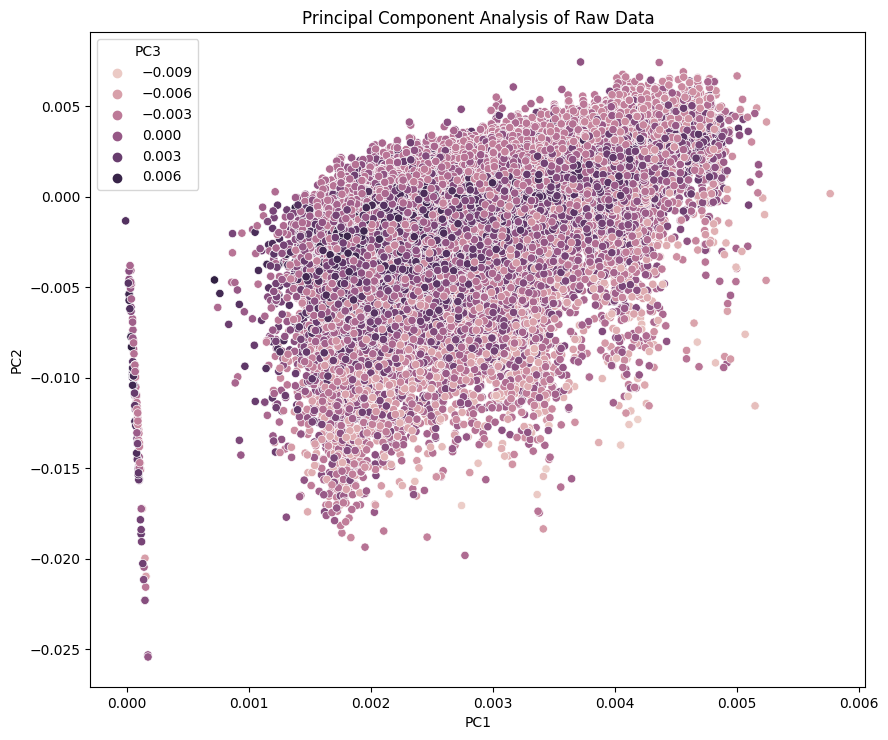

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.scatterplot(x = raw_musics_pca.components_[0], y = raw_musics_pca.components_[1], hue = raw_musics_pca.components_[2], ax = axs)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.legend(title = 'PC3')
axs.set_title('Principal Component Analysis of Raw Data')
plt.show()
plt.close()

A partir da figura, é possível observar que há dois principais blocos nos quais os dados estão distribuídos. No lado inferior esquerdo, há uma extensa linha na qual uma pequena fração das músicas está linearmente disposta, o que, em um primeiro momento, aparenta ser alguma anomalia ou algum conjunto de pontos especificamente diferente dos demais, o qual potencialmente pode conter alguma informação de interesse. A vasta gama desses objetos, entretanto, encontra-se na porção central da imagem, em um bloco volumoso, aparentemente homogêneo e sem nenhuma suscetibilidade a formas de agrupamento imediatas ou triviais. Em termos da tarefa de clusterização, isso não é uma característica favorável e potencialmente implica na necessidade por uma transformação nos dados para se extrair critérios de variância nas músicas que permitam o estabelecimento de uma noção de similaridade e de diferença robusta. Outra possibilidade é uma inadequação do mecanismo de redução de dimensionalidade via PCA com relação a esse conjunto de dados, mas isso não será explorado a fundo.

## **Preparação dos Dados**
Primeiramente, a base de dados original foi processada de tal forma a remover as entradas com valores faltantes. A escolha por essa abordagem se deve ao fato de que apenas uma entrada estava com problemas, de modo que o impacto de sua remoção seja irrelevante. Em seguida, as colunas de interesse foram selecionadas, sendo elas: “artists”, “track_name”, “danceability”, “energy”, “key”, “loudness”, “mode”, “speechiness”, “acousticness”, “instrumentalness”, “liveness”, “valence”, “tempo” e “time_signature”. As duas primeiras foram incluídas para fins de identificação de cada música e unidas em um único atributo, "song", para fins de formatação, enquanto as demais foram julgadas relevantes para a representação computacional desse objeto. Um detalhe adicional foi a realização do deslocamento do atributo "loudness" para que seu intervalo de valores começasse em 0. A motivação por trás dessa decisão vem de uma maior conveniência em processos de normalização quando o intervalo de todos os valores começa em 0, além de que, na prática, a variância dessa dimensão não é alterada e, portanto, espera-se que não haja prejuízos em termos da clusterização.

In [ ]:
# Filtering the relevant columns and removing missing entries.
treated_musics_db = musics_db.dropna()[['artists', 'track_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
treated_musics_db['song'] = '(' + treated_musics_db['artists'] + ') ' + treated_musics_db['track_name']
treated_musics_db = treated_musics_db.drop(['artists', 'track_name'], axis = 1)
points_musics_db = treated_musics_db[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']].copy()
points_musics_db['loudness'] = points_musics_db['loudness'] + np.abs(points_musics_db['loudness'].min())

O foco da preparação dos dados diz respeito à escolha de uma representação adequada para as músicas no espaço d-dimensional, tarefa que, como discutido previamente, não é trivial. Em particular, os atributos julgados relevantes para essa modelagem, apesar de todos numéricos - não havendo, portanto, a necessidade de se discretizar variáveis categóricas - apresentam magnitudes e intervalos de distribuição heterogêneos entre si. Além disso, o próprio peso de cada um na disposição espacial do ponto referente a uma música possui impactos relevantes em noções de proximidade (i.e. similaridade) e, portanto, esse lado também deve ser ponderado com cautela.

Para fins da prática sendo realizada, estipula-se que cada atributo deva colaborar de maneira igualitária com a posição do ponto referente a cada música no espaço, isto é, todas as colunas colaboram homogeneamente com a caracterização desse objeto. Ademais, também é de interesse que haja uma maximização da "clusterabilidade" do conjunto de dados, isto é, assumindo essa premissa de caracterização regular, deseja-se maximizar similaridades próximas e minimizar similaridades distantes.

Com esses objetivos em mente, um primeiro passo foi o elenco de três metodologias distintas de normalização, "mean normalization", "minmax normalization" e "division by sum normalization", a fim de verificar seu comportamento quando aplicadas sobre as músicas (mais detalhes sobre o funcionamento de cada uma encontram-se nos comentários do código fonte). Cada uma assume diferentes premissas e imprime diferentes significados sobre os dados. Após a efetivação da normalização, a dimensionalidade foi novamente reduzida via PCA e as três primeiras componentes principais foram plotadas em um gráfico 2-dimensional para fins de validação. A seguir, tem-se os resultados.

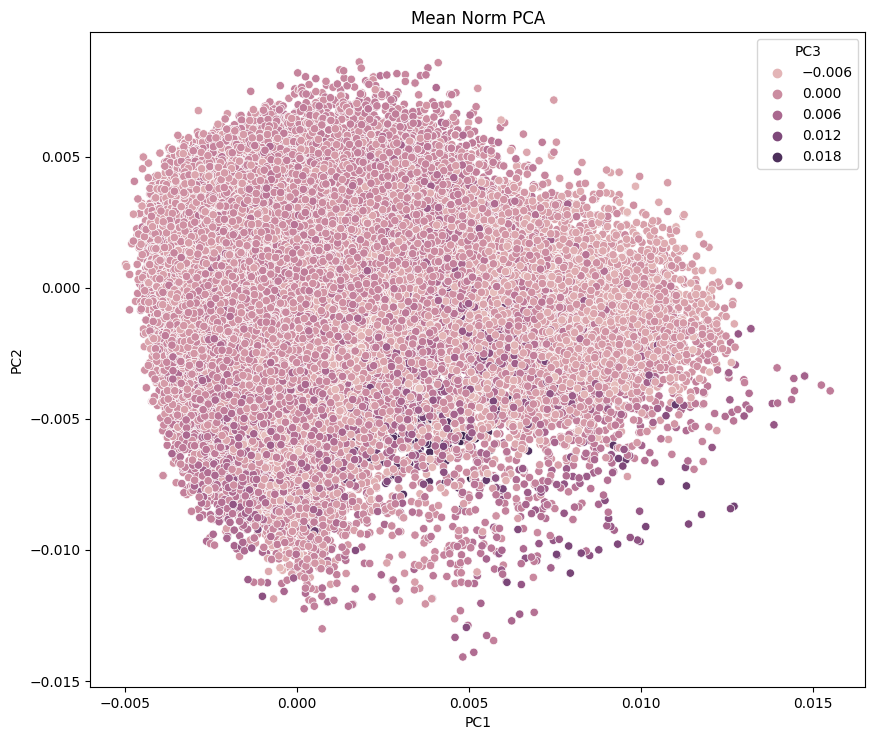

In [ ]:
# Mean normalization.
# Centralizes the data and normalizes it by the standard deviation, such that each column is now measured in std units.
mean_norm_db = (points_musics_db - points_musics_db.mean()) / points_musics_db.std()
mean_norm_db = np.transpose(mean_norm_db.to_numpy())

mean_norm_pca = PCA(n_components = 3)
mean_norm_pca.fit(mean_norm_db)

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.scatterplot(x = mean_norm_pca.components_[0], y = mean_norm_pca.components_[1], hue = mean_norm_pca.components_[2], ax = axs)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.legend(title = 'PC3')
axs.set_title('Mean Norm PCA')
plt.show()
plt.close()

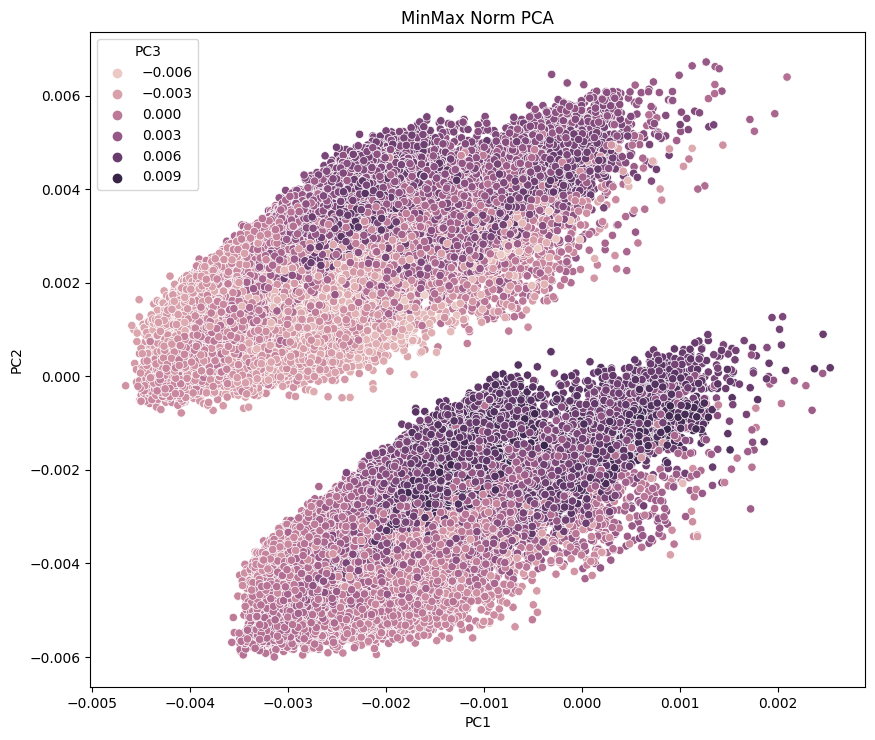

In [ ]:
# MinMax normalization.
# Since every column has a minimum value of 0, essentialy divides each by its maximum value, such that every range becomes [0, 1].
minmax_norm_db = (points_musics_db - points_musics_db.min()) / (points_musics_db.max() - points_musics_db.min())
minmax_norm_db = np.transpose(minmax_norm_db.to_numpy())

minmax_norm_pca = PCA(n_components = 3)
minmax_norm_pca.fit(minmax_norm_db)

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.scatterplot(x = minmax_norm_pca.components_[0], y = minmax_norm_pca.components_[1], hue = minmax_norm_pca.components_[2], ax = axs)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.legend(title = 'PC3')
axs.set_title('MinMax Norm PCA')
plt.show()
plt.close()

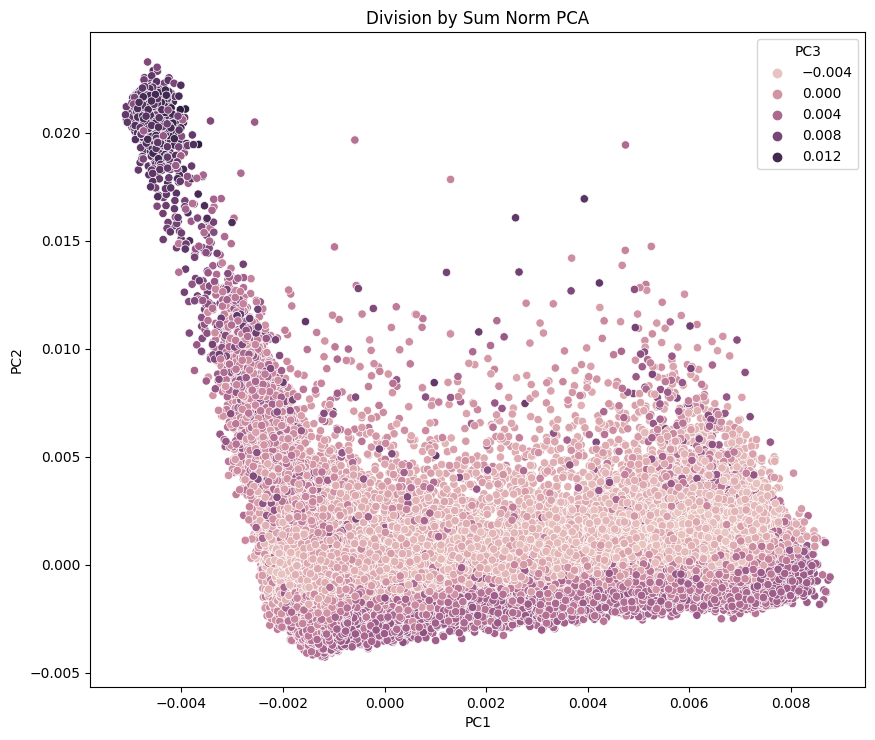

In [ ]:
# Division by sum normalization.
# Makes it so that each column's values sum up to 1. It's a probability-like normalization.
sum_norm_db = points_musics_db / points_musics_db.sum()
sum_norm_db = np.transpose(sum_norm_db.to_numpy())

sum_norm_pca = PCA(n_components = 3)
sum_norm_pca.fit(sum_norm_db)

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.scatterplot(x = sum_norm_pca.components_[0], y = sum_norm_pca.components_[1], hue = sum_norm_pca.components_[2], ax = axs)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.legend(title = 'PC3')
axs.set_title('Division by Sum Norm PCA')
plt.show()
plt.close()

A partir das figuras acima, é possível observar que, pelo menos em termos das componentes principais do PCA, os processos de normalização não colaboram substancialmente com o aprimoramento da "clusterabilidade" dos dados.

No caso, é nítido que o método "mean normalization" foi aquele que menos contribuiu com alguma forma de agrupamento das músicas, as quais se encontram homogeneamente distribuídas em um bloco central volumoso, sem muita distinção em termos de nenhuma componente. O método "minmax normalization", por sua vez, foi capaz de gerar dois clusters visualmente bem definidos para os dados, resultado que possivelmente é devido a alguma coluna que, por mais que seja numérica, é um mapeamento discreto e direto de um conjunto de categorias, como "mode", "key" ou "time_stamp". Dentro de cada bloco, também, é possível ver algum grau de distinção em termos da terceira componente principal. Por fim, o método "division by sum" também apresentou alguns resultados interessantes. Em termos das duas primeiras componentes, observa-se a existência de dois blocos distintos de músicas e, por meio da terceira componente principal, além dessa divisão ser enaltecida, surge uma estratificação do maior bloco.

Novamente, reitera-se que essa adaptação para a visualização em duas dimensões via PCA leva a uma perda de informações, além de envolver questões de adequação. Portanto, os resultados obtidos devem ser tomados apenas como referência para a escolha de uma representação adequada. Nesse contexto, mesmo que, em termos visuais, seu resultado tenha sido o menos satisfatório, optou-se pela "mean normalization" como a metodologia de pré-processamento dos dados. A razão por trás dessa escolha se deve ao fato de que, a partir dela, os valores de cada coluna estão uniformizados por unidades de desvio padrão, o que minimiza impactos referentes a diferentes magnitudes e caracteriza cada música conforme sua distância da média com relação a cada atributo, o que foi interpretado como o mais compatível com os objetivos mencionados previamente. Acredita-se que, mesmo com uma visualização em 2-dimensões via PCA não muito promissora, essa normalização seja capaz de capturar adequadamente as características e a variância das músicas sob as premissas elencadas.

In [ ]:
norm_musics_db = (points_musics_db - points_musics_db.mean()) / points_musics_db.std()

## **Modelagem**
A etapa de modelagem constitui o pivô central da tarefa de clusterização. Retomando os objetivos principais do trabalho, deseja-se comparar diferentes algoritmos de agrupamento sobre o conjunto de músicas, agora representadas por pontos 12-dimensionais centralizados e normalizados pelo desvio-padrão. Aqui, também reitera-se aquilo mencionado na introdução da tarefa em mais detalhes. Dada sua "alta" dimensionalidade (o suficiente para não haver uma visualização direta) e a facultabilidade na escolha e na normalização dos atributos que as representam, não é óbvio a maneira como as músicas existem em seu espaço real. A questão é que cada algoritmo de clusterização possui um cenário de aplicação "ideal" que envolve uma compatibilidade com a silhueta dos respectivos dados. Assim, a escolha dos algoritmos que serão comparados também é uma forma de se conhecer mais sobre a disposição das músicas, tomando como referência a métrica de qualificação adotada para o estudo.

Nesse sentido, foram escolhidos três diferentes algoritmos de agrupamento: "KMeans", "DBSCAN" e "Spectral Clustering". O primeiro é baseado em uma metodologia iterativa de aproximação dos hiperplanos que segregam subespaços de dados sob a premissa de otimização de sua similaridade, sendo compatível com clusters convexos e incapaz de lidar com "outliers". O segundo segue uma abordagem de crescimento de grupos de pontos conforme uma relação de vizinhança pré-estabelecida, comportando-se bem para dados não-convexos e homogeneamente densos. O terceiro, por sua vez, é baseado em métodos da álgebra linear sobre a manipulação de matrizes que aproximam a distribuição dos pontos e otimizam sua similaridade, apresentando uma boa versatilidade.

Outro ponto fundamental é a escolha adequada de parâmetros para os algoritmos de clusterização. Em particular, de maneira simplificada, os primeiro e terceiro algoritmos exigem o número k de clusters desejados, enquanto o segundo recebe como parâmetro dois valores, eps e min_samples, que dizem respeito ao raio de similaridade e ao número mínimo de vizinhos para um ponto ser popular (demais parâmetros mais específicos para os três métodos foram deixados nos valores padrão da biblioteca). Aqui, a abordagem adotada foi definir o número de clusters desejado como a quantidade de valores únicos da coluna "track_genre", referente ao gênero musical, da base de dados. A ideia é assumir essa classificação como uma forma esperada de disposição dos dados no espaço, tomando como premissa que músicas de um mesmo gênero têm características razoavelmente parecidas (no caso do "DBSCAN", os parâmetros foram refinados de modo que a quantidade de clusters gerados fosse por volta do determinado para os outros dois algoritmos). Além disso, a determinação da métrica de distância utilizada por cada um para a computação das similaridades entre as músicas também é extremamente relevante. No caso, tendo em vista uma uniformidade e por ter sido julgada adequada à modelagem proposta, foi utilizada a distância euclidiana (também, o padrão da biblioteca).

Em cada caso, a clusterização em si foi feita e, novamente, os grupos de pontos foram plotados com dimensionalidade reduzida via PCA a partir de suas duas componentes principais, sendo o espaço de cores, anteriormente utilizado para a terceira componente, reservado ao agrupamento. Dada a grande quantidade de clusters e de pontos, os resultados foram divididos em vários gráficos, com aproximadamente 10 clusters por cada.

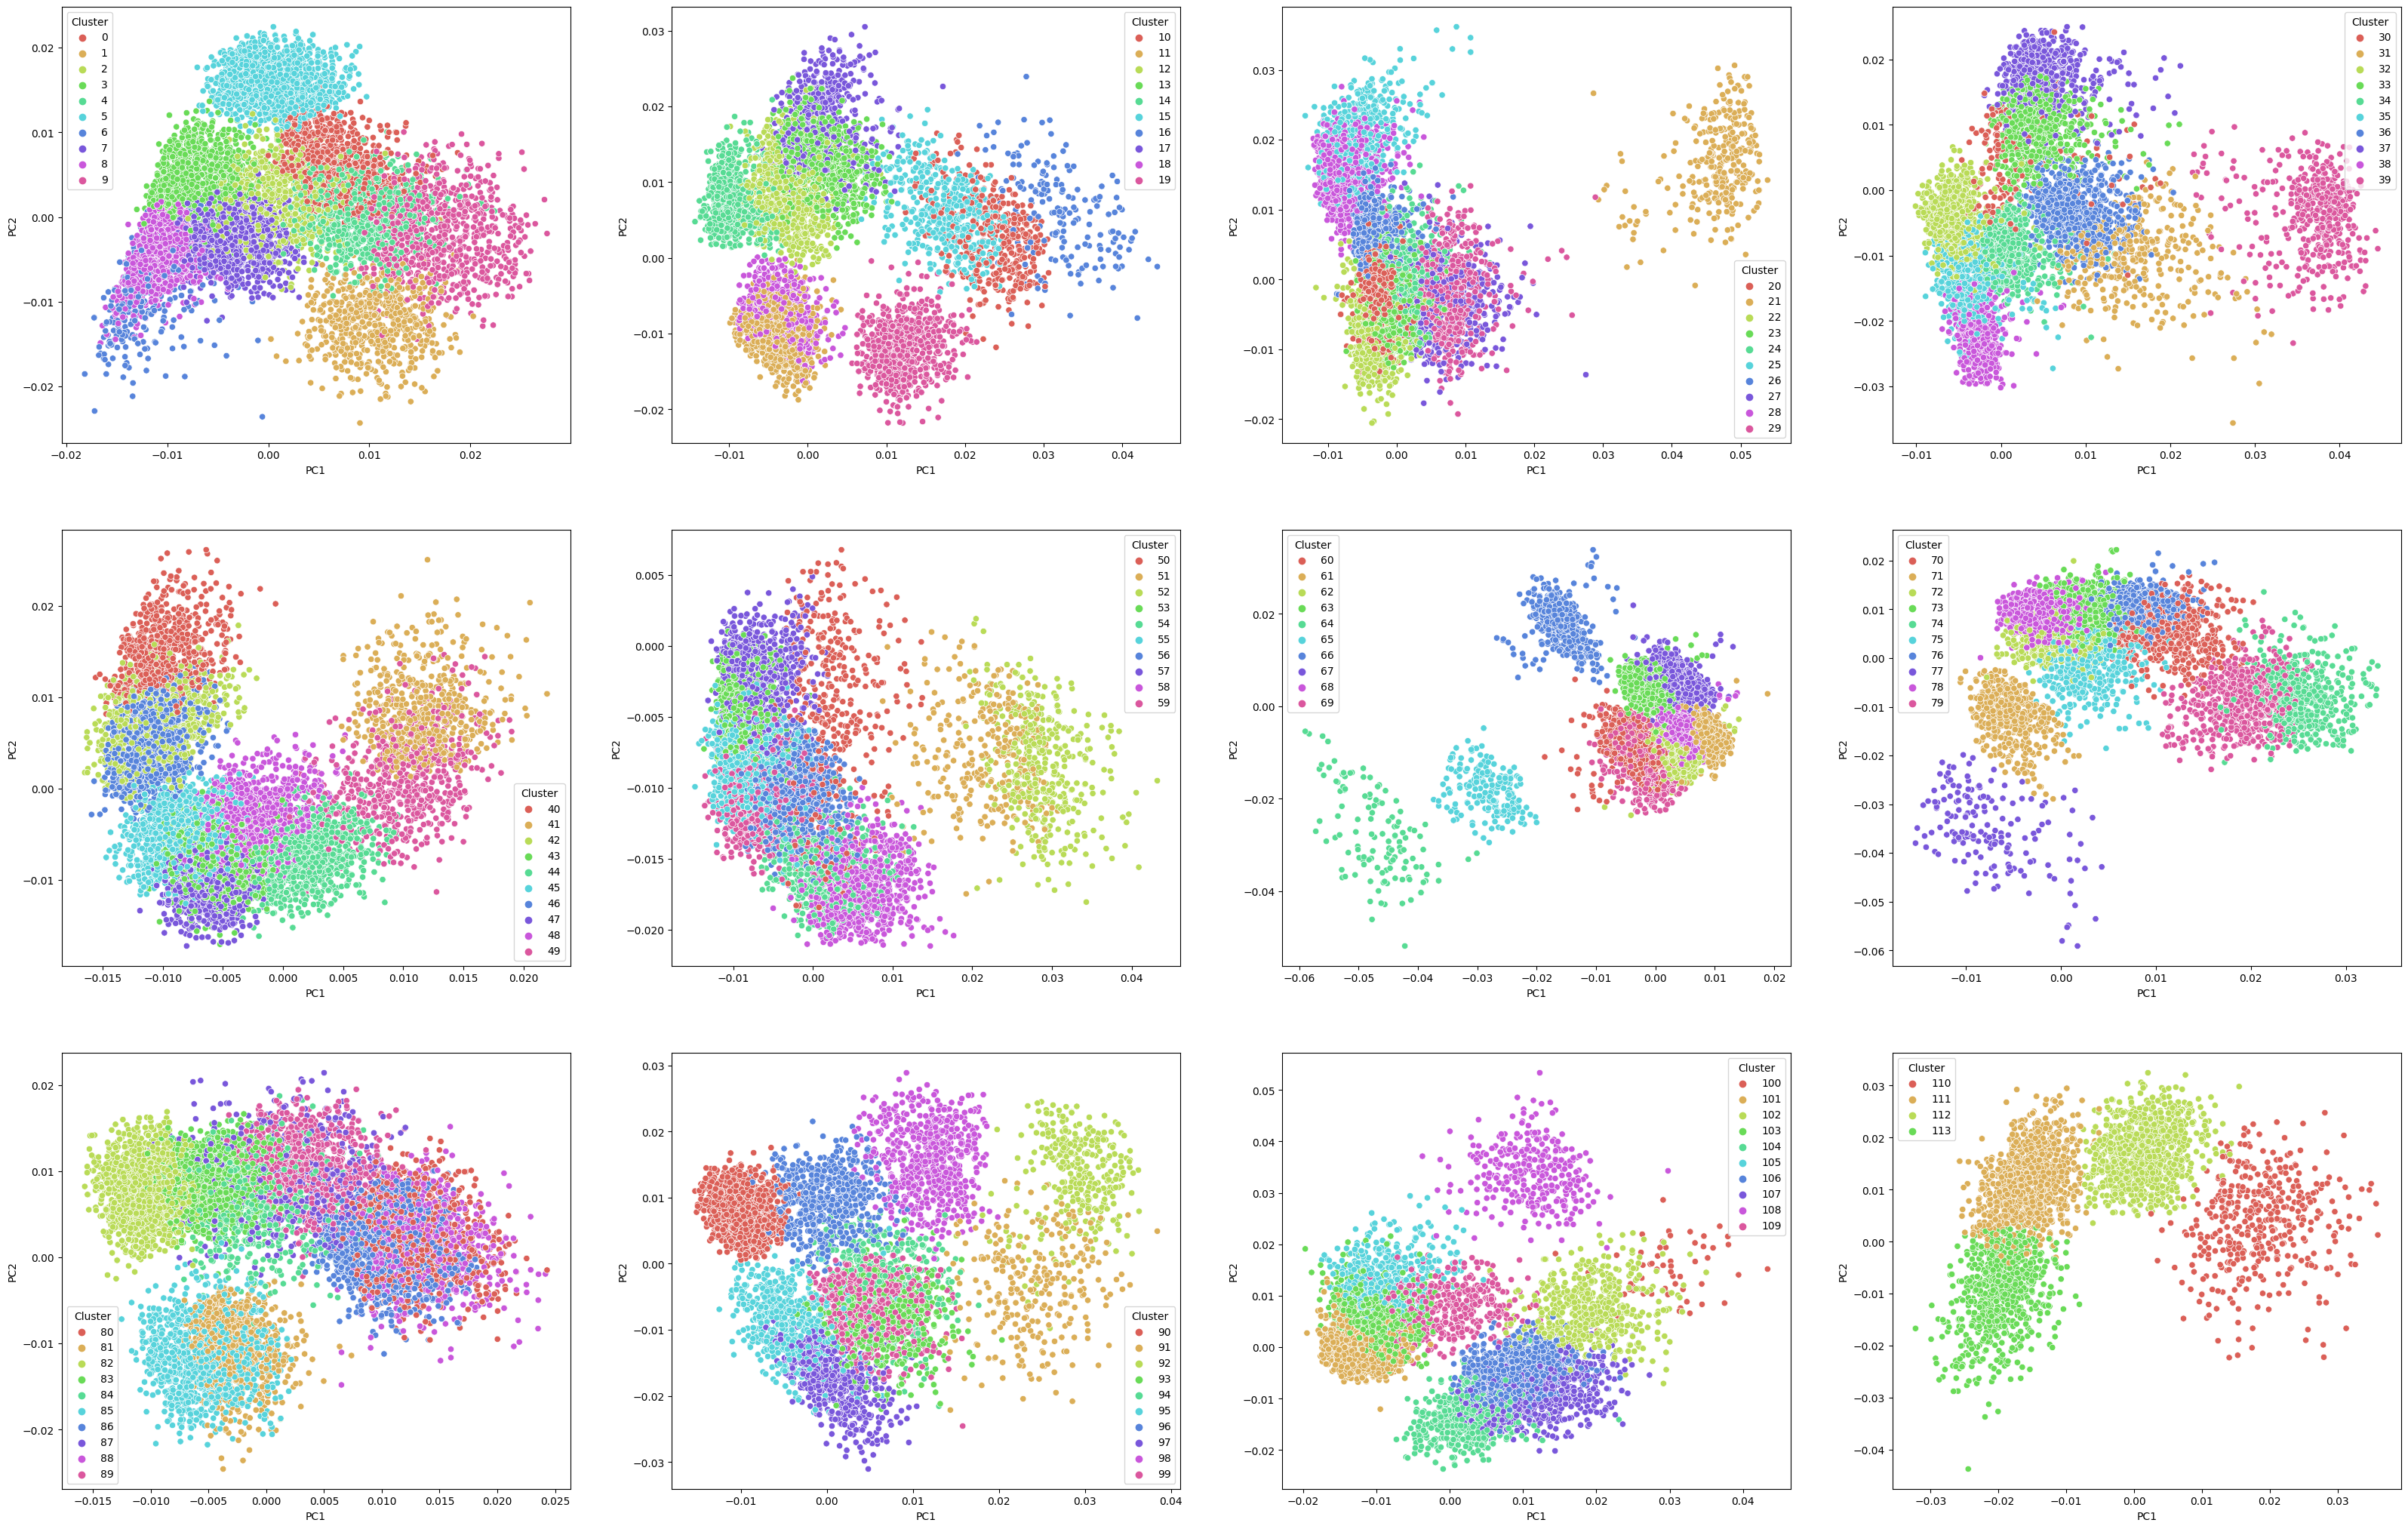

In [ ]:
# KMeans.
musics_kmeans = KMeans(n_clusters = 114, n_init = 10)
musics_kmeans.fit(norm_musics_db)

kmeans_db = norm_musics_db.copy()
kmeans_db['cluster'] = musics_kmeans.labels_

fig, axs = plt.subplots(nrows = 3, ncols = 4)
fig.set_size_inches(40, 25.5)
for i in range(3):
  for j in range(4):
    points_db = kmeans_db[kmeans_db['cluster'].isin(range((i * 40 + j * 10), ((i * 40 + j * 10) + 10)))]
    clusters = points_db['cluster'].to_numpy()
    points_db = np.transpose(points_db.drop('cluster', axis = 1).to_numpy())
    points_pca = PCA(n_components = 2)
    points_pca.fit(points_db)
    sns.scatterplot(x = points_pca.components_[0], y = points_pca.components_[1], hue = clusters, ax = axs[i][j], palette = sns.color_palette("hls", 10))
    axs[i][j].set_xlabel('PC1')
    axs[i][j].set_ylabel('PC2')
    axs[i][j].legend(title = 'Cluster')
plt.show()
plt.close()

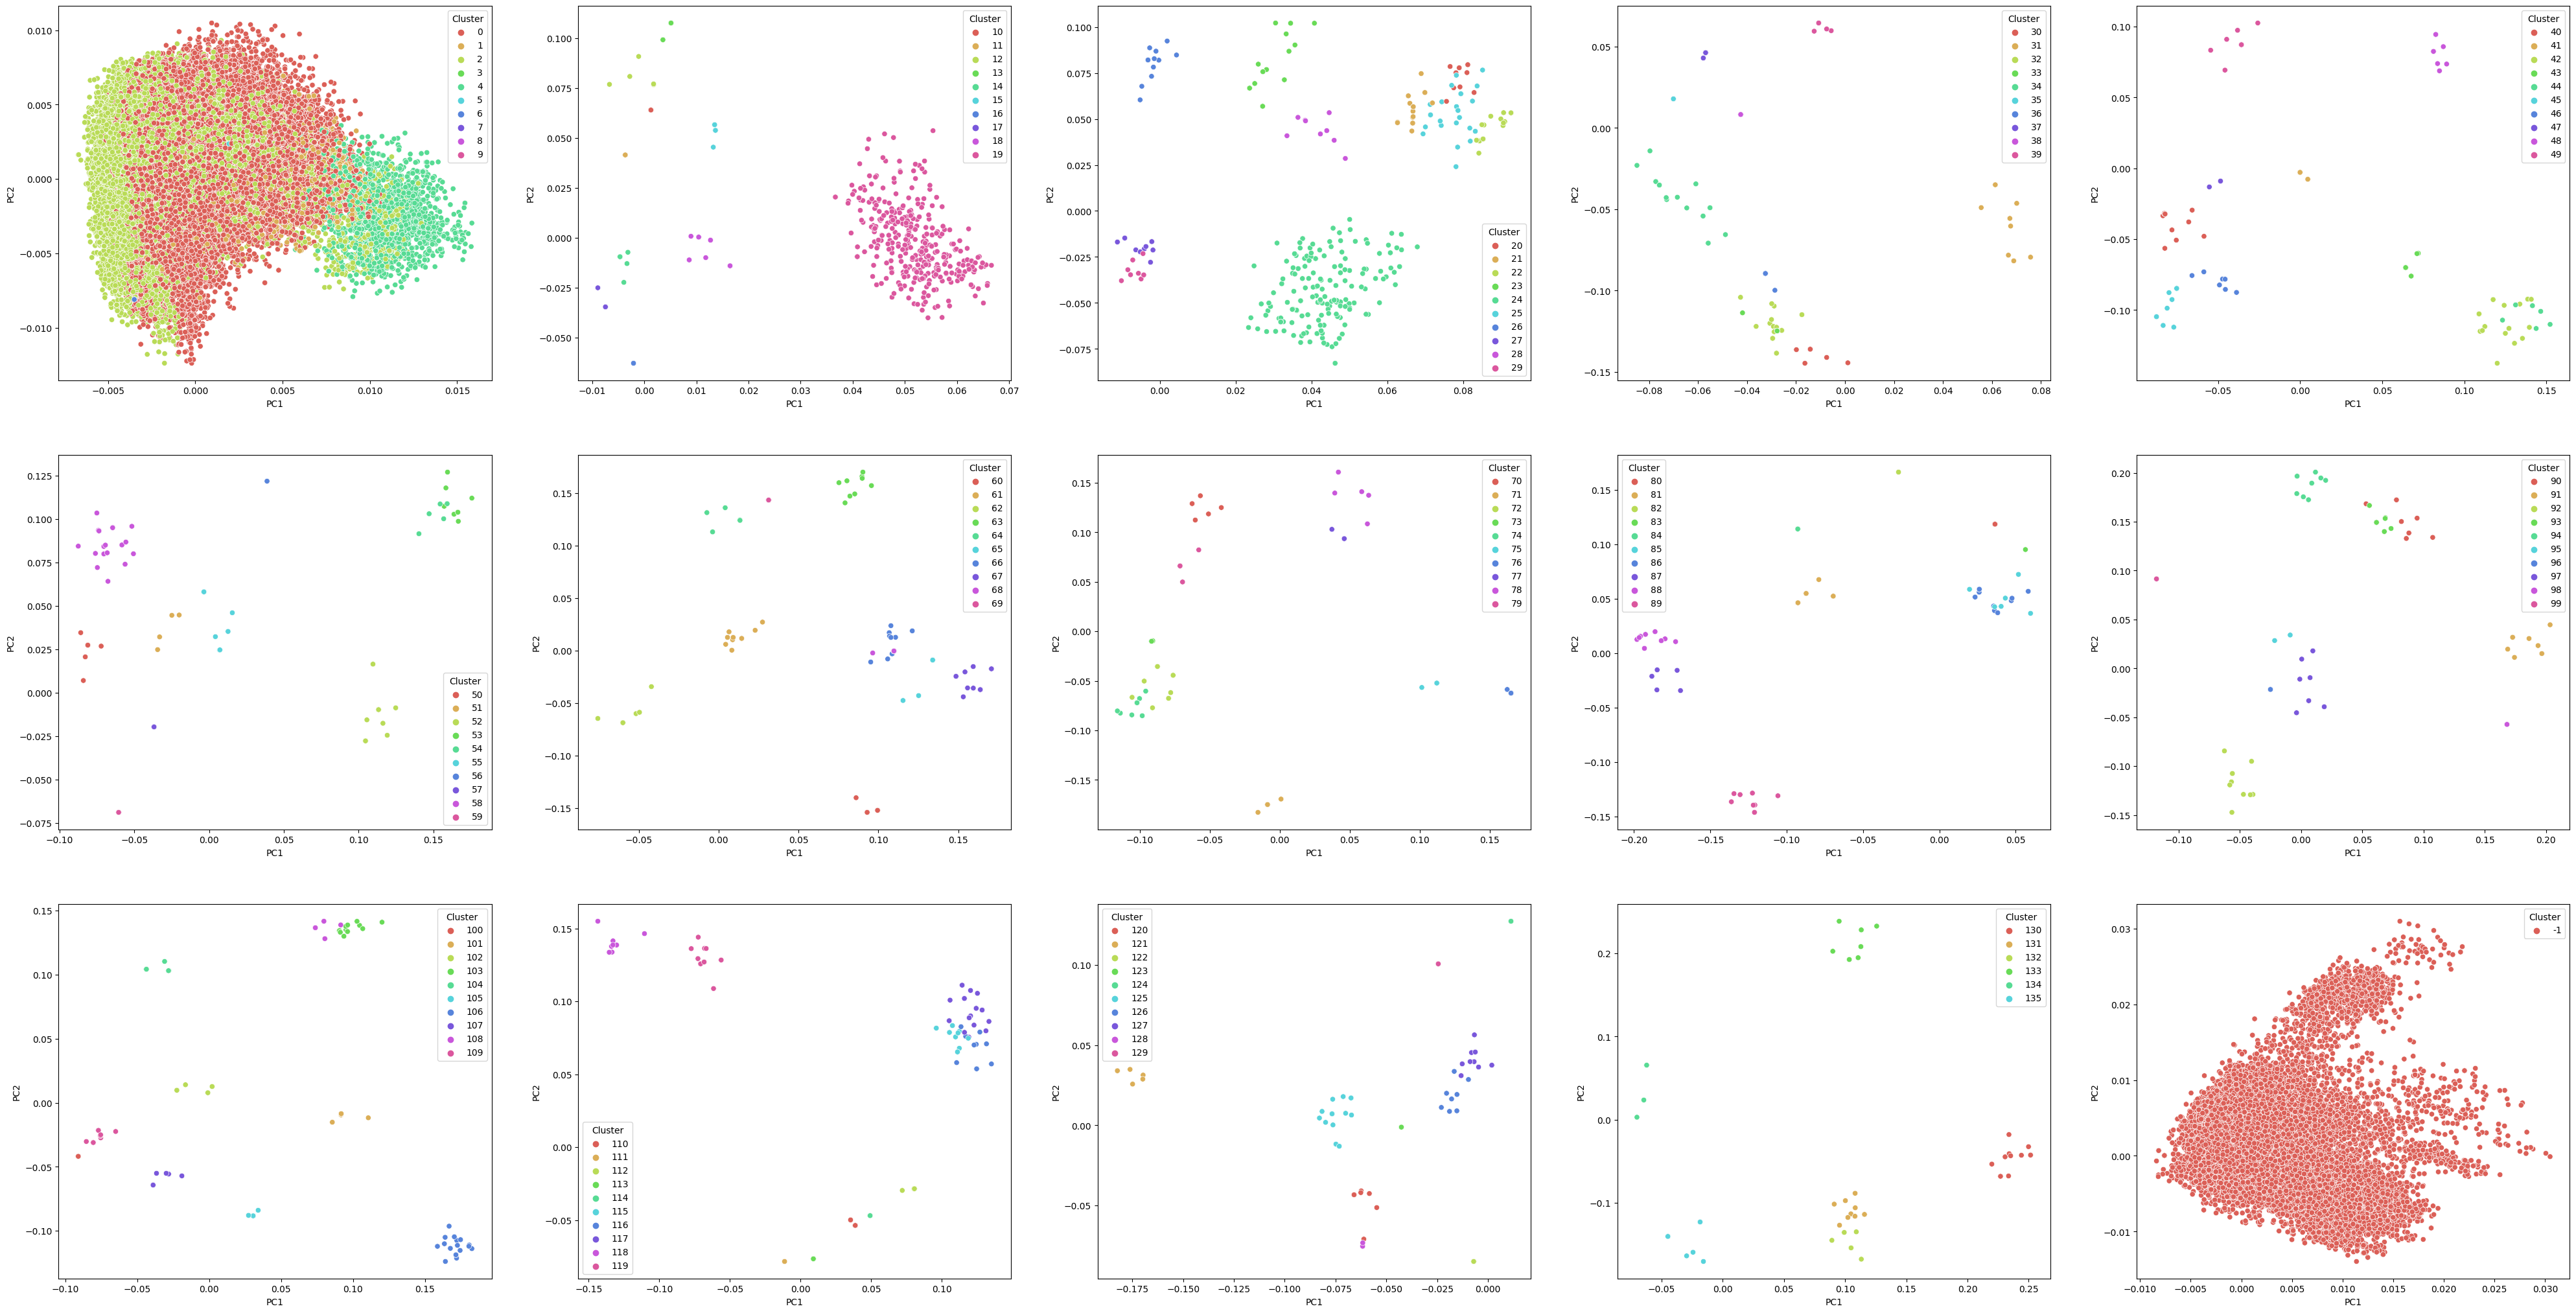

In [ ]:
# DBSCAN.
musics_dbscan = DBSCAN(eps = 1, min_samples = 10)
musics_dbscan.fit(norm_musics_db)

dbscan_db = norm_musics_db.copy()
dbscan_db['cluster'] = musics_dbscan.labels_

fig, axs = plt.subplots(nrows = 3, ncols = 5)
fig.set_size_inches(50, 25.5)
for i in range(3):
  for j in range(5):
    if i == 2 and j == 4:
      points_db = dbscan_db[dbscan_db['cluster'] == -1]
    else:
      points_db = dbscan_db[dbscan_db['cluster'].isin(range((i * 50 + j * 10), ((i * 50 + j * 10) + 10)))]
    clusters = points_db['cluster'].to_numpy()
    points_db = np.transpose(points_db.drop('cluster', axis = 1).to_numpy())
    points_pca = PCA(n_components = 2)
    points_pca.fit(points_db)
    sns.scatterplot(x = points_pca.components_[0], y = points_pca.components_[1], hue = clusters, ax = axs[i][j], palette = sns.color_palette("hls", 10))
    axs[i][j].set_xlabel('PC1')
    axs[i][j].set_ylabel('PC2')
    axs[i][j].legend(title = 'Cluster')
plt.show()
plt.close()

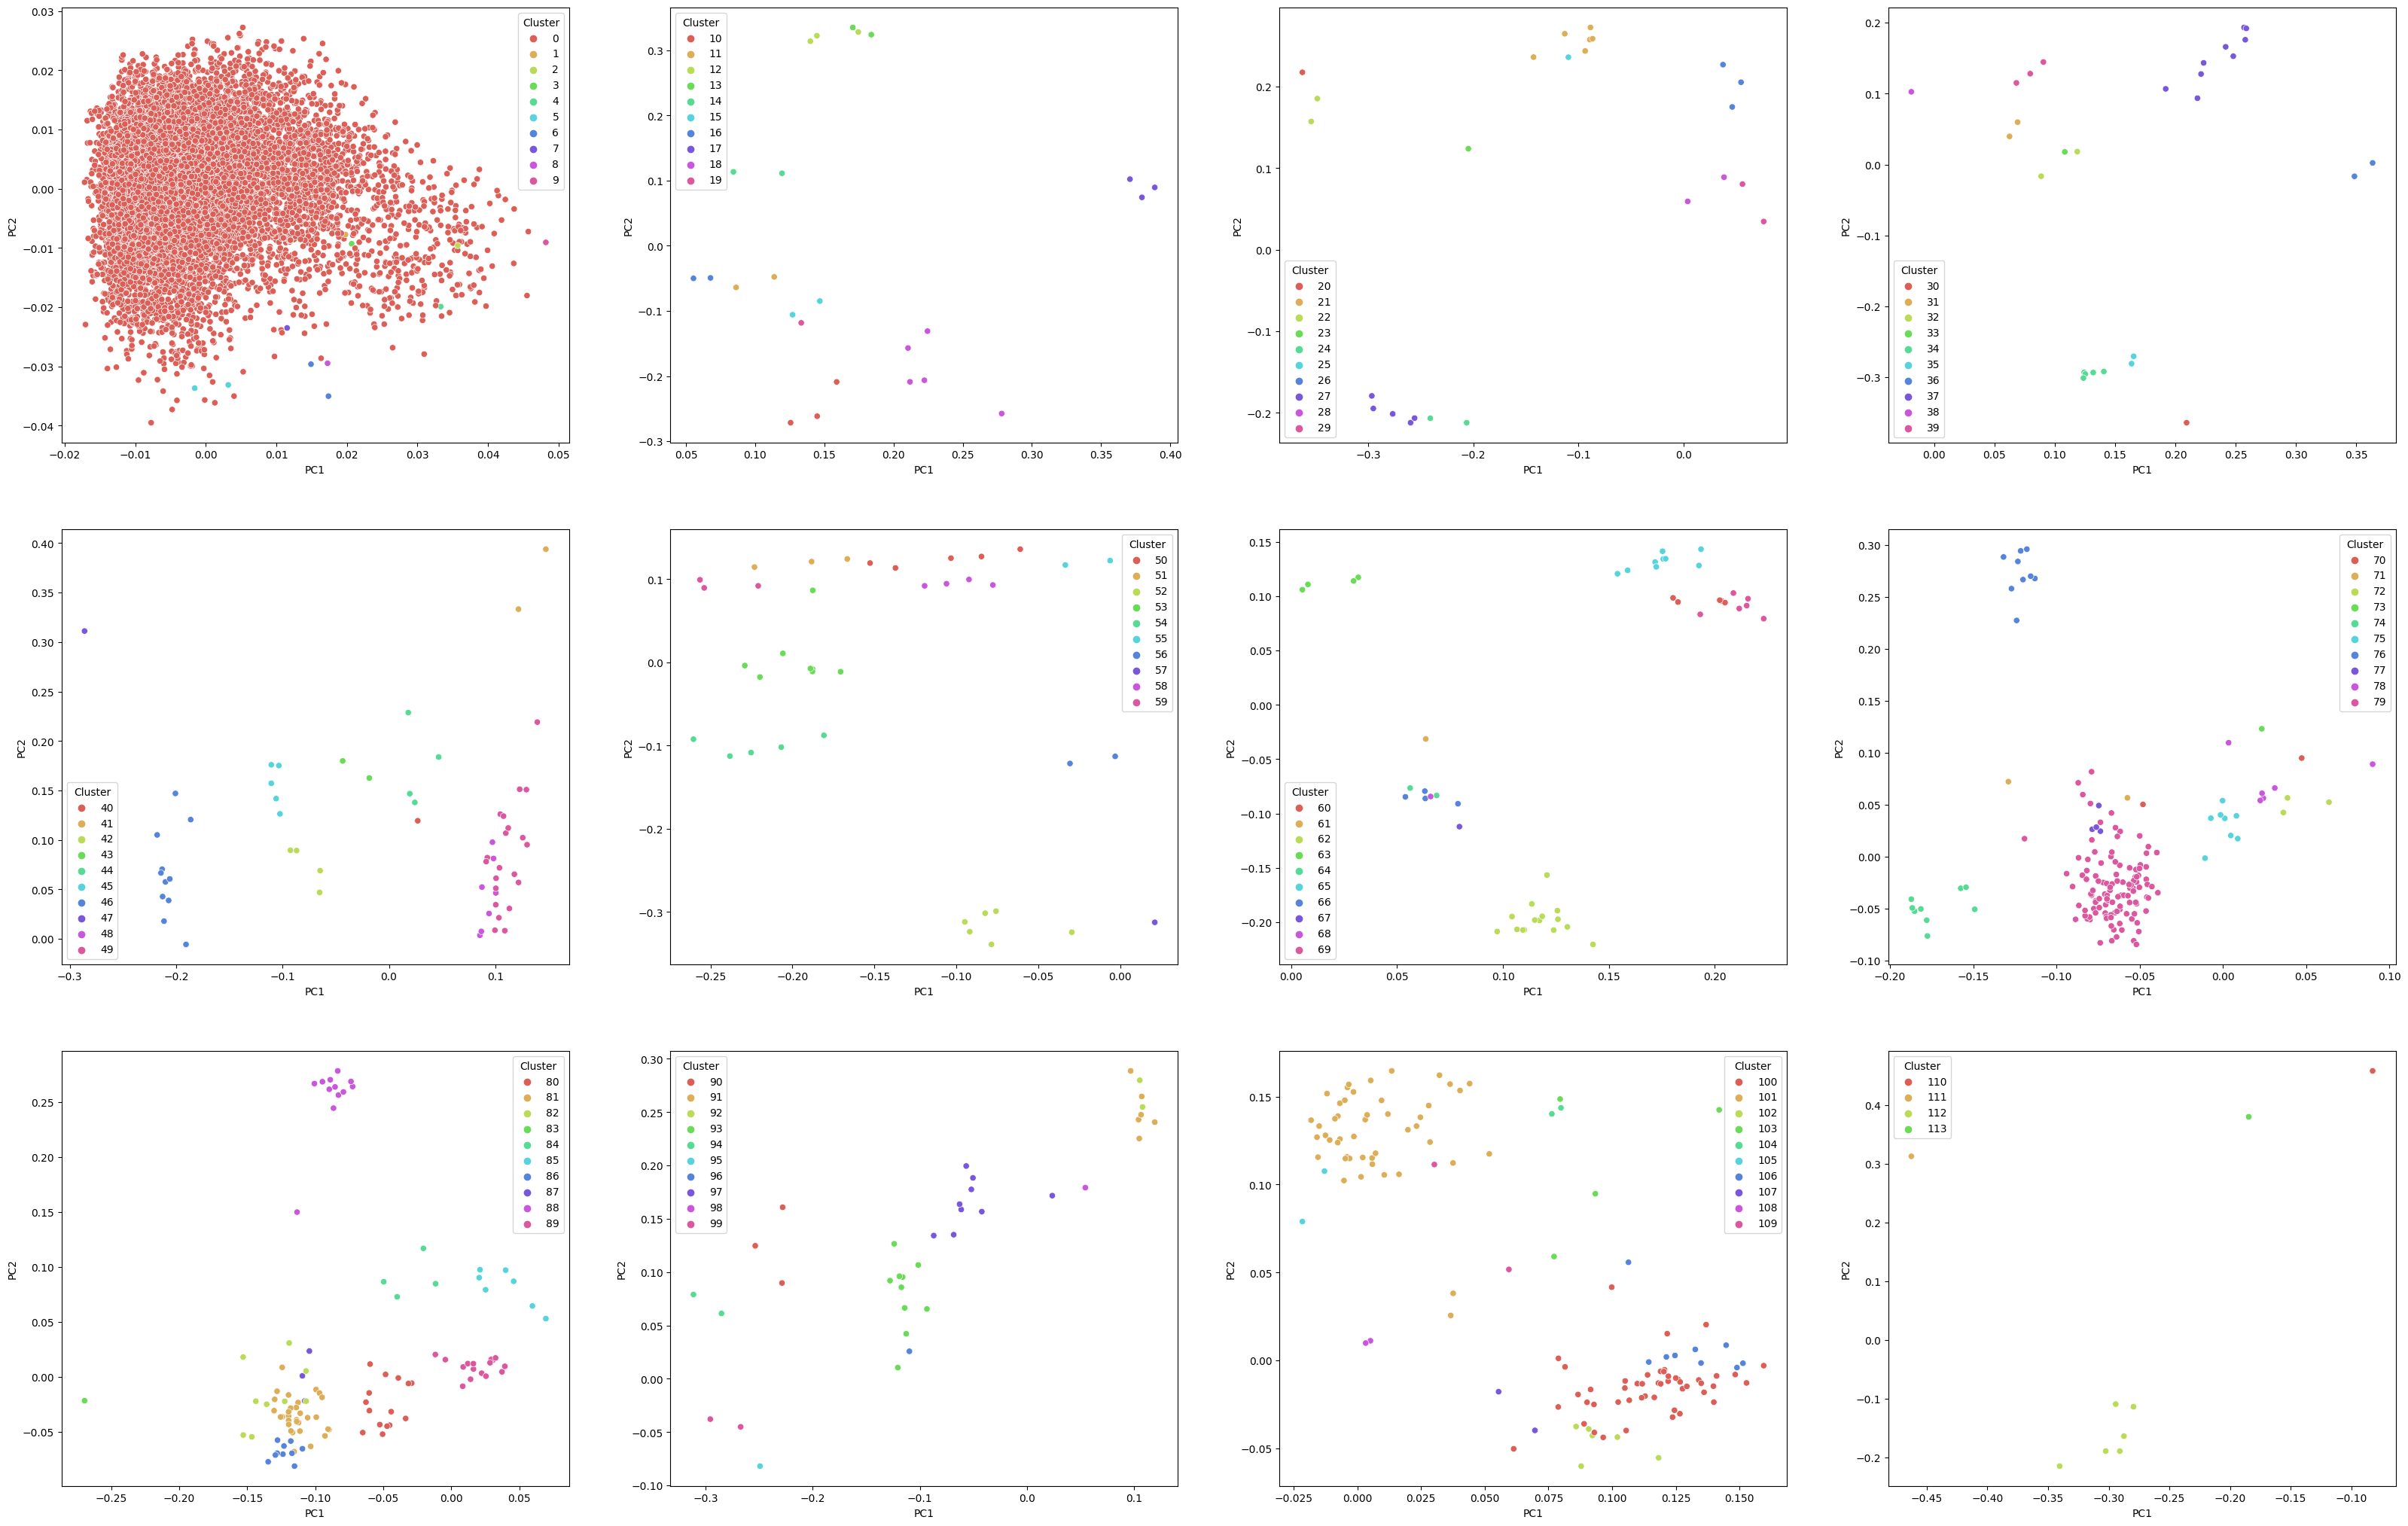

In [ ]:
# Generates a smaller sample from the distribution of the songs.
sample_treated_musics_db = treated_musics_db.sample(n = 10000)
sample_points_musics_db = sample_treated_musics_db[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']].copy()
sample_points_musics_db['loudness'] = sample_points_musics_db['loudness'] + np.abs(sample_points_musics_db['loudness'].min())
sample_norm_musics_db = (sample_points_musics_db - sample_points_musics_db.mean()) / sample_points_musics_db.std()

# Spectral Clustering.
musics_specclust = SpectralClustering(n_clusters = 114)
musics_specclust.fit(sample_norm_musics_db)

specclust_db = sample_norm_musics_db.copy()
specclust_db['cluster'] = musics_specclust.labels_

fig, axs = plt.subplots(nrows = 3, ncols = 4)
fig.set_size_inches(40, 25.5)
for i in range(3):
  for j in range(4):
    points_db = specclust_db[specclust_db['cluster'].isin(range((i * 40 + j * 10), ((i * 40 + j * 10) + 10)))]
    clusters = points_db['cluster'].to_numpy()
    points_db = np.transpose(points_db.drop('cluster', axis = 1).to_numpy())
    points_pca = PCA(n_components = 2)
    points_pca.fit(points_db)
    sns.scatterplot(x = points_pca.components_[0], y = points_pca.components_[1], hue = clusters, ax = axs[i][j], palette = sns.color_palette("hls", 10))
    axs[i][j].set_xlabel('PC1')
    axs[i][j].set_ylabel('PC2')
    axs[i][j].legend(title = 'Cluster')
plt.show()
plt.close()

Um detalhe importante a ser destacado é que, para fins de aplicação do algoritmo "Spectral Clustering", um subconjunto aleatório da base de dados original, contando apenas com 10000 entradas, foi selecionado. A razão para isso se deve a limitações de memória existentes no ambiente do Google Colab. Assim, esse fato deve ser ponderado para fins de validação desse agrupamento de músicas.

## **Adendo: Métrica de Validação**

Como mencionado na introdução do trabalho, é de interesse se utilizar dados referentes a playlists de usuários do Spotify para a validação dos agrupamentos produzidos por cada abordagem de clusterização. A ideia é que, tendo em vista um mecanismo de recomendação, assume-se que as músicas usualmente escutadas em conjunto pelos ouvintes são um parâmetro razoável para se ponderar metodologias que almejam estabelecer algum grau de similaridades entre elas.

A base de dados selecionada para essa tarefa foi tratada de maneira parecida com o feito até o momento, incluindo a remoção de entradas com dados faltantes e a renomeação de colunas. No total, existem 12.9 milhões de entradas, cada qual correspondente a uma música contida na playlist de um usuário. A base é organizada de tal forma que cada playlist é representada por um conjunto de entradas individuais relativas a cada uma de suas músicas. Para fins de aplicação da métrica de validação sendo construída, esse formato deverá ser tratado de modo que cada entrada represente uma playlist de um usuário por seu conjunto de músicas. Incluindo as já mencionadas, no total, há 4 colunas: ID do usuário, nome do artista, título da música e nome da playlist, todas de interesse. Novamente, as colunas contendo o nome do artista e o título da música foram unidas para fins de padronização e de formatação.

Apenas como um detalhe adicional, era de interesse inicial realizar uma mineração de padrões frequentes nesse conjunto de playlists e, a partir deles, validar a qualidade das diferentes formas de clusterização. Entretanto, a base de dados escolhida conta com muitas entradas, excedendo a capacidade de memória do Google Colab. Além disso, a quantidade de músicas únicas também é relativamente grande, o que leva a "cestas" esparsas e prejudica a captura de padrões frequentes relevantes.

In [ ]:
playlists_db = pd.read_csv('https://media.githubusercontent.com/media/bereis01/Stuff/main/spotifyplaylists.csv', on_bad_lines = 'skip')

In [ ]:
playlists_db = playlists_db.dropna()
playlists_db = playlists_db.rename(columns={' "artistname"': 'artist_name', ' "trackname"': 'song_name', ' "playlistname"': 'playlist_name'})
playlists_db['song'] = '(' + playlists_db['artist_name'] + ') ' + playlists_db['song_name']
playlists_db = playlists_db.drop(['artist_name', 'song_name'], axis = 1)
playlists_db = playlists_db[playlists_db['song'].isin(treated_musics_db['song'].unique())]

Em termos práticos, a base de dados contendo as playlists de usuários foi tratada da seguinte forma. Para cada clusterização produzida na etapa de modelagem, os identificadores de cluster foram mapeados às respectivas músicas na base de playlists. Após isso, esta foi agrupada tomando como chaves o ID de usuário e o nome da playlist. Dessa forma, ao final, obteve-se três novas bases de dados, uma para cada algoritmo de clusterização, nas quais as entradas correspondem a cada playlist de usuário, caracterizada pelos atributos ID, nome e lista de músicas, sendo cada música representada por seu identificador de cluster.

A métrica em si foi definida de maneira extremamente simples: a qualidade da clusterização com relação a uma playlist é determinada pelo número de índices de cluster únicos nela presentes dividido pelo seu tamanho. A ideia por trás dessa definição é tentar capturar a "qualidade" como um resultado de músicas pertencentes a uma mesma playlist estarem contidas em um mesmo cluster, isto é, serem similares. A seguir, os valores dessa métrica para cada playlist e para cada clusterização foram computados e dispostos em um formato de histograma, no qual é possível visualizar sua distribuição. Reiterando que valores próximos de 0 indicam playlists com uma alta coesão de cluster e valores próximos de 1 indicam playlists extremamente heterogêneas com relação ao agrupamento.

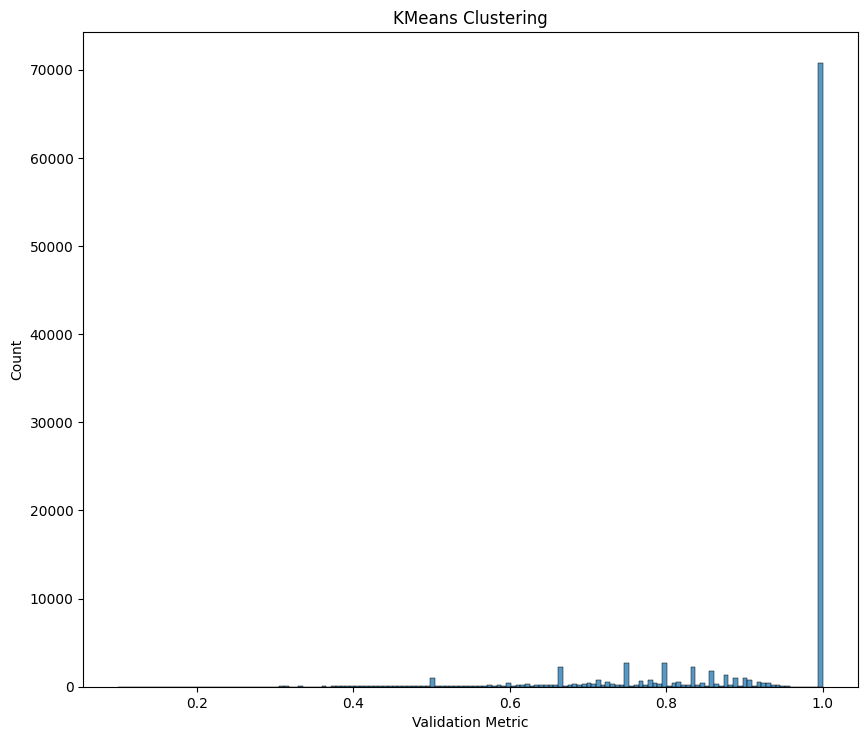

In [ ]:
# KMeans analysis.
kmeans_results = pd.concat([treated_musics_db['song'], kmeans_db['cluster']], axis = 1)
kmeans_playlists = playlists_db.join(kmeans_results.set_index('song'), on = 'song').dropna().drop_duplicates()
kmeans_grouped_playlists = kmeans_playlists.groupby(['user_id','playlist_name'])['cluster'].apply(list).reset_index()

total_values = kmeans_grouped_playlists['cluster'].apply(lambda x : np.size(x))
unique_values = kmeans_grouped_playlists['cluster'].apply(lambda x : np.size(np.unique(x)))
metric = unique_values / total_values

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.histplot(metric, ax = axs)
axs.set_xlabel('Validation Metric')
axs.set_title('KMeans Clustering')
plt.show()
plt.close()

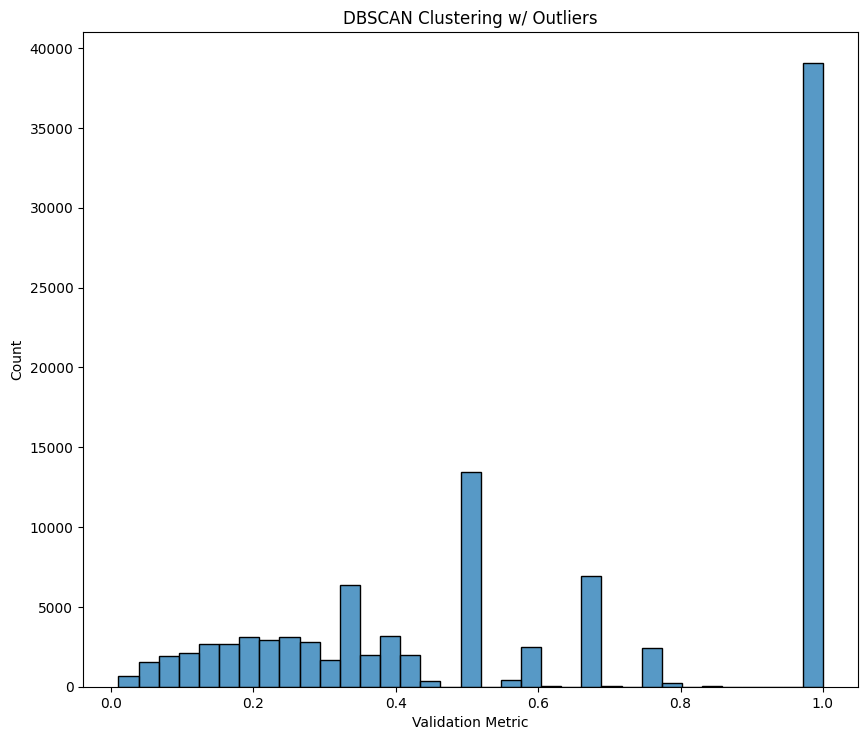

In [ ]:
# DBSCAN analysis w/ outliers.
dbscan_results = pd.concat([treated_musics_db['song'], dbscan_db['cluster']], axis = 1)
dbscan_playlists = playlists_db.join(dbscan_results.set_index('song'), on = 'song').dropna().drop_duplicates()
dbscan_grouped_playlists = dbscan_playlists.groupby(['user_id','playlist_name'])['cluster'].apply(list).reset_index()

total_values = dbscan_grouped_playlists['cluster'].apply(lambda x : np.size(x))
unique_values = dbscan_grouped_playlists['cluster'].apply(lambda x : np.size(np.unique(x)))
metric = unique_values / total_values

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.histplot(metric, ax = axs)
axs.set_xlabel('Validation Metric')
axs.set_title('DBSCAN Clustering w/ Outliers')
plt.show()
plt.close()

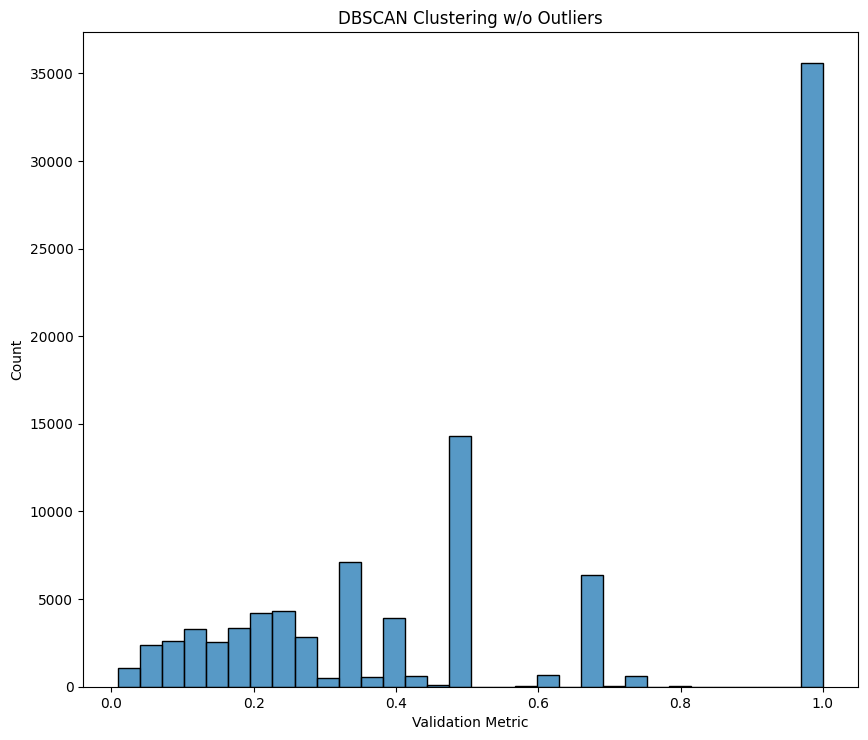

In [ ]:
# DBSCAN analysis w/o outliers.
dbscan_results = pd.concat([treated_musics_db['song'], dbscan_db['cluster']], axis = 1)
dbscan_playlists = playlists_db.join(dbscan_results.set_index('song'), on = 'song').dropna().drop_duplicates()
dbscan_playlists = dbscan_playlists[dbscan_playlists['cluster'] != -1]
dbscan_grouped_playlists = dbscan_playlists.groupby(['user_id','playlist_name'])['cluster'].apply(list).reset_index()

total_values = dbscan_grouped_playlists['cluster'].apply(lambda x : np.size(x))
unique_values = dbscan_grouped_playlists['cluster'].apply(lambda x : np.size(np.unique(x)))
metric = unique_values / total_values

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.histplot(metric, ax = axs)
axs.set_xlabel('Validation Metric')
axs.set_title('DBSCAN Clustering w/o Outliers')
plt.show()
plt.close()

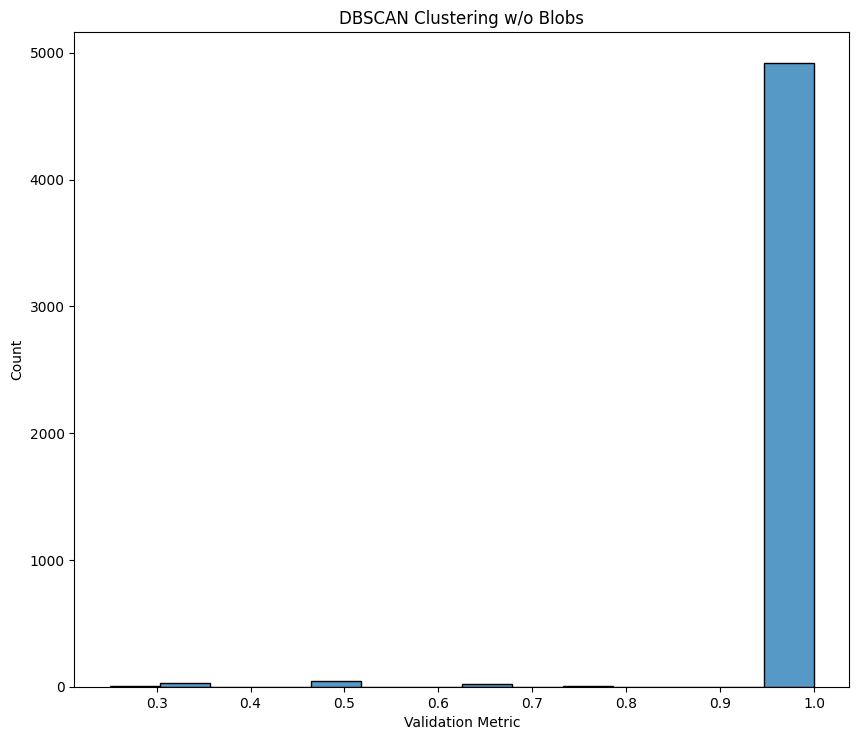

In [ ]:
# DBSCAN analysis w/o blobs.
dbscan_results = pd.concat([treated_musics_db['song'], dbscan_db['cluster']], axis = 1)
dbscan_playlists = playlists_db.join(dbscan_results.set_index('song'), on = 'song').dropna().drop_duplicates()
dbscan_playlists = dbscan_playlists[~dbscan_playlists['cluster'].isin([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]
dbscan_grouped_playlists = dbscan_playlists.groupby(['user_id','playlist_name'])['cluster'].apply(list).reset_index()

total_values = dbscan_grouped_playlists['cluster'].apply(lambda x : np.size(x))
unique_values = dbscan_grouped_playlists['cluster'].apply(lambda x : np.size(np.unique(x)))
metric = unique_values / total_values

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.histplot(metric, ax = axs)
axs.set_xlabel('Validation Metric')
axs.set_title('DBSCAN Clustering w/o Blobs')
plt.show()
plt.close()

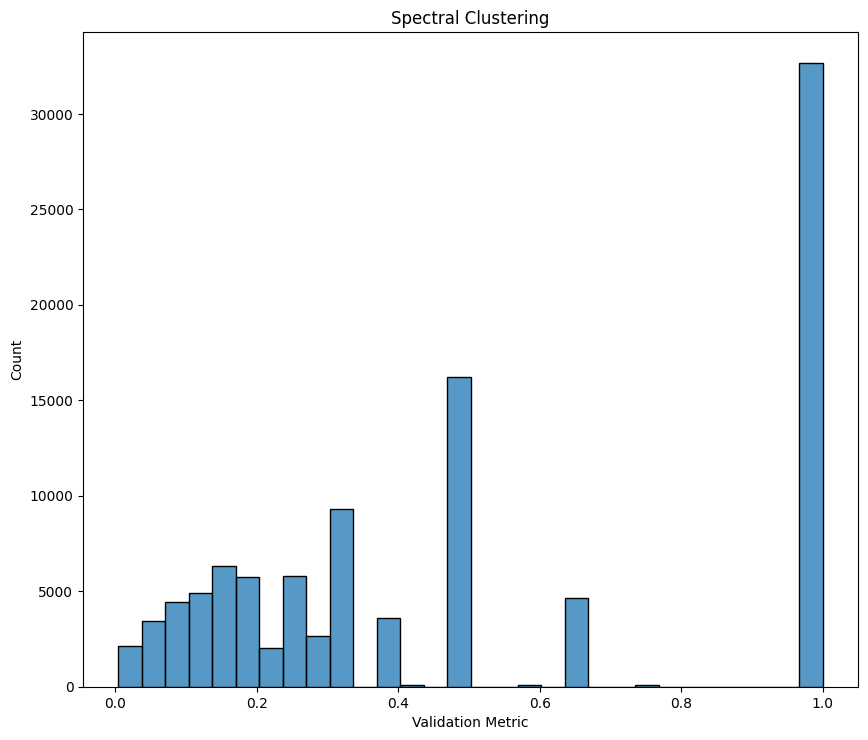

In [ ]:
# Spectral Clustering analysis.
specclust_results = pd.concat([sample_treated_musics_db['song'], specclust_db['cluster']], axis = 1)
specclust_playlists = playlists_db.join(specclust_results.set_index('song'), on = 'song').drop_duplicates()
specclust_grouped_playlists = specclust_playlists.groupby(['user_id','playlist_name'])['cluster'].apply(list).reset_index()

total_values = specclust_grouped_playlists['cluster'].apply(lambda x : np.size(x))
unique_values = specclust_grouped_playlists['cluster'].apply(lambda x : np.size(np.unique(x)))
metric = unique_values / total_values

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.histplot(metric, ax = axs)
axs.set_xlabel('Validation Metric')
axs.set_title('Spectral Clustering')
plt.show()
plt.close()

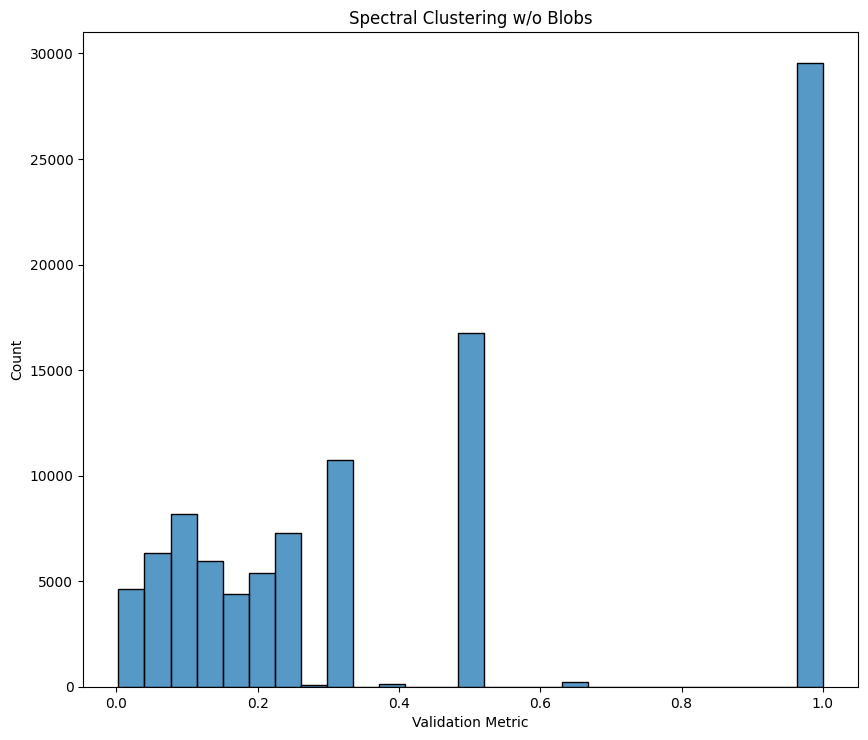

In [ ]:
# Spectral Clustering analysis w/o blobs.
specclust_results = pd.concat([sample_treated_musics_db['song'], specclust_db['cluster']], axis = 1)
specclust_playlists = playlists_db.join(specclust_results.set_index('song'), on = 'song').drop_duplicates()
specclust_playlists = specclust_playlists[~specclust_playlists['cluster'].isin([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]
specclust_grouped_playlists = specclust_playlists.groupby(['user_id','playlist_name'])['cluster'].apply(list).reset_index()

total_values = specclust_grouped_playlists['cluster'].apply(lambda x : np.size(x))
unique_values = specclust_grouped_playlists['cluster'].apply(lambda x : np.size(np.unique(x)))
metric = unique_values / total_values

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.histplot(metric, ax = axs)
axs.set_xlabel('Validation Metric')
axs.set_title('Spectral Clustering w/o Blobs')
plt.show()
plt.close()

## **Apresentação e Validação dos Resultados**
Dos gráficos produzidos na etapa de modelagem, é nítido que a abordagem via KMeans parece ter sido a mais compatível com o conjunto de dados. Nela, é possível ver que a silhueta de cada cluster é bem definida e, mesmo havendo alguns casos de sobreposição intensa entre blocos de dados, no geral, a massa está distribuída de maneira homogênea e segregada pelos diversos agrupamentos. Por outro lado, na abordagem DBSCAN, observa-se a formação de três grandes clusters no início do processamento e, após isso, a junção de pequenas porções de músicas de maneira extremamente esparsa e rarefeita. Além disso, uma magnitude extremamente elevada de pontos foram considerados outliers, mesmo estando aparentemente próximos no mapeamento 2-dimensional via PCA. Por fim, o método Spectral Clustering apresentou resultados parecidos com o DBSCAN. A maioria dos clusters é esparsa e rarefeita, com a exceção de apenas um cluster, o qual aparenta concentrar grande parte da massa dos dados.

Em termos da métrica de análise definida, o resultado, entretanto, é o oposto. A partir das distribuições, é possível observar que o agrupamento via KMeans foi aquele com os piores valores, com a maior parte das playlists concentrada no valor 1, isto é, cada música a ela pertencente foi designada a um cluster diferente. Por outro lado, as abordagens via DBSCAN e Spectral Clustering apresentaram resultados um pouco mais razoáveis. Por mais que a massa dos valores ainda esteja concentrada em 1, a cauda existente no sentido de menor magnitude é um pouco mais pesada. Uma questão que foi levantada e explorada nos histogramas, ainda, é o fato de que o DBSCAN gera um cluster de pontos inválidos, ou "outliers", os quais, em efeito, não deveriam ser considerados. Removendo-o da análise e plotando novamente o histograma, entretanto, observa-se que não houve alterações significativas.

Por outro lado, levanta-se um contraponto sobre os conhecimentos adquiridos a partir desse estudo. Nas abordagens DBSCAN e Spectral Clustering, foi possível notar a formação de uma pequena quantidade de clusters massivos, os quais concentram grande parte dos dados, e uma grande quantidade de pequenos clusters esparsos e rarefeitos. Essa característica, mesmo que de maneira não desejada, acaba por favorecer os valores da métrica de validação definida, já que uma grande quantidade de músicas, incidentemente, irá pertencer a alguma dessas grandes amálgamas e, portanto, os valores únicos intra-playlist serão menores. Em uma tentativa de reverter esse processo, os clusters massivos foram removidos dos agrupamentos desses dois algoritmos e a métrica, recalculada e plotada novamente. Dessa vez, os resultados para o DBSCAN sofreram uma grande perda, chegando a ser piores do que o observado no KMeans. Interessantemente, o histograma para o Spectral Clustering não sofreu grandes alterações.

Por fim, algumas métricas para avaliação de processo de clusterização sem o conhecimento do rótulo real dos objetos foram aplicadas sobre os resultados obtidos. Em particular, duas métricas foram escolhidas. A primeira, denominada "Índice de Calinski-Harabasz", é definida com a razão da soma da dispersão inter-cluster pela soma da dispersão intra-cluster para todos os clusters. Quanto maior seu valor, melhor definidos são os clusters. A segunda, nomeada "Índice de Davis-Boudin", computa a similaridade entre os clusters como uma função de suas distâncias e de seus tamanhos. Quanto menor seu valor, mais separados são os clusters. A seguir, tem-se os resultados.

In [ ]:
kmeans_CH = calinski_harabasz_score(norm_musics_db, musics_kmeans.labels_)
kmeans_DB = davies_bouldin_score(norm_musics_db, musics_kmeans.labels_)

dbscan_CH = calinski_harabasz_score(norm_musics_db, musics_dbscan.labels_)
dbscan_DB = davies_bouldin_score(norm_musics_db, musics_dbscan.labels_)

specclust_CH = calinski_harabasz_score(sample_norm_musics_db, musics_specclust.labels_)
specclust_DB = davies_bouldin_score(sample_norm_musics_db, musics_specclust.labels_)

metrics = pd.DataFrame({'calinski_harabasz': [kmeans_CH, dbscan_CH, specclust_CH], 'davies_bouldin': [kmeans_DB, dbscan_DB, specclust_DB]}, index = ['KMeans', 'DBSCAN', 'SpecClust'])
metrics

calinski_harabasz  davies_bouldin
KMeans           3060.432832        1.777289
DBSCAN            195.720537        1.337077
SpecClust          21.808868        1.175490

Alguns obstáculos devem ser levados em conta com relação a esses resultados. Em particular, essas métricas não são homogêneas, ou "justas", com relação aos diferentes algoritmos sendo avaliados. Ambos os índices tendem a apresentar valores maiores para clusterizações convexas, como aquela produzida pelo KMeans, em comparação a outras formas de clusterização, por exemplo, por densidade, como aquela proposta pelo DBSCAN. Mesmo assim, da tabela, observa-se que, como esperado, o KMeans apresentou o melhor índice de Calinski-Harabasz e o pior índice de Davies-Bouldin. O algoritmo Spectral Clustering, por sua vez, apresentou o pior valor para o índice de Calinski-Harabasz e o melhor valor para o índice de Davies-Bouldin.

## **Implantação e Conclusões**
O presente trabalho prático teve como objetivos a modelagem de músicas como pontos de dados em um espaço d-dimensional, a aplicação de diferentes abordagens de clusterização, a elaboração de uma métrica de análise baseada em playlists de usuários e, finalmente, a validação conforme dos resultados. De maneira geral, pode ser extraído que, no estudo conduzido, a abordagem de clusterização via KMeans foi aquela que melhor se comportou. Porém, houveram vários pesares ao longo do caminho que devem ser discutidos e levados em conta.

Entretanto, antes disso, o fato de o KMeans ter se comportado melhor sobre a base de dados escolhida permite a realização de algumas suposições sobre seu formato e sua distribuição. Em particular, pode-se pensar que as músicas estejam agrupadas de alguma maneira convexa no espaço 12-dimensional construído, em que volumes de dados encontram-se envolta de centros de massa segregados entre si por hiperplanos que configuram uma forma de particionamento adequada e bem definida.

Retomando a questão dos pesares, os resultados obtidos foram fruto de diversas escolhas tomadas, algumas ponderadas, outras não, que contribuíram para a maneira como os dados foram lapidados e estudados. Em particular, primeiramente, a forma de normalização pode ter tido impactos significativos na distribuição espacial dos dados no universo construído. Talvez alguma forma alternativa maximizasse ainda mais similaridades e minimizasse ainda mais disparidades, contribuindo para uma clusterização superior. Além disso, os próprios atributos escolhidos talvez possam não ter sido adequados para caracterizar, em conjunto, uma música, o que pode ter levado a disparidades, paradoxos ou contradições em sua análise. Por último, a escolha dos algoritmos, também, foi uma decisão facultativa que pode não ter sido a ideal. Novamente, reiterando a introdução do trabalho, dado que a visualização dos dados musicais é difícil e que não existe uma forma de rotulamento "real", tais decisões são ainda menos triviais, ponto no qual estudos empíricos, como o aqui realizado, podem ser úteis para se compreender melhor a natureza do problema.

Ademais, outro ponto de conflitos na análise realizada foi a construção da métrica de validação das clusterizações. A ideia por trás do uso de playlists vem da noção de se utilizar dados factuais de como usuários escolhem músicas para julgar a similaridade proposta pelos agrupamentos. O problema é que, da forma como foi feita, a métrica não era robusta quanto a anormalidades na clusterização. Em particular, dada sua definição, uma clusterização em que todas as músicas pertencem ao mesmo cluster seria ótima, o que, na prática, é claramente inviável e pouco específico, principalmente quando se tem mecanismos de recomendação em mente. Nesse sentido, um ponto de melhora seria o refinamento da métrica de validação para capturar mais a ideia de "especificidade", ainda com foco em uma alta coesão intra-playlist.

Finalmente, também surgiram alguns outros problemas de natureza técnica que, talvez, sejam interessantes de se mencionar. Particularmente, as bases de dados escolhidas eram razoavelmente grandes (a base de playlists, por exemplo, possuía milhões de entradas e um tamanho pouco superior a 1GB). Isso gerou algumas complicações com os limites de memória impostos pela plataforma do Google Colab. Especialmente, alguns algoritmos, como o Spectral Clustering, constróem matrizes quadraticamente proporcionais ao tamanho da entrada, de modo que o custo de memória para grandes bases de dados seja extremamente relevante (o que, inclusive, motivou a redução da base de dados para efeito de estudo deste algoritmo, como mencionado). Esse tamanho também impossibilitou a mineração de padrões frequentes nas playlists para, então, validação da coesão gerada pela clusterização, o que se julgava ser interessante para a extração de novos conhecimentos.

## **Referências Bibliográficas**
Stack Exchange, Inc.. Stack Overflow [Online]. Disponível em: https://stackoverflow.com/ (Acessado em: 06/11/2023).

scikit developers. SciKit Learn [Online]. Disponível em: https://scikit-learn.org/stable/index.html (Acessado em: 06/11/2023).

The pandas development team. Pandas [Online]. Disponível em: https://pandas.pydata.org/ (Acessado em: 06/11/2023).

Kaggle. Kaggle Datasets [Online]. Disponível em: https://www.kaggle.com/datasets (Acessado em: 06/11/2023).